In [1]:
# we extract the data from Experimental runs excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# preparing the data for SVM cubic regression model
df = pd.read_excel("Experimental Runs.xlsx")
pd.set_option('display.max_rows', 15)
df = df.iloc[14:70, :]
df.drop(df.columns[[0, 4, 7, 8, 9, 10, 11, 12]], axis=1, inplace=True)
df.drop(df.loc[:, 'Unnamed: 14':'Unnamed: 25'].columns, axis = 1, inplace = True)
df.rename(columns={'Unnamed: 13': 'RMS(g)'},inplace=True)
df.dropna(subset = ['RMS(g)'], inplace=True)
df

,Cutting Speed (m/min),Feed (mm/rec),Depth of cut (mm),RPM,Diameter(mm),RMS(g)
14,130.0,0.15,1.0,700.0,60.0,-71.2050
15,130.0,0.15,0.8,700.0,60.0,-68.9960
16,130.0,0.35,0.6,700.0,60.0,-58.2630
17,130.0,0.45,0.4,700.0,60.0,-46.8290
18,130.0,0.55,0.2,700.0,60.0,-46.6674
...,...,...,...,...,...,...
65,35.0,0.22,0.4,290.0,38.0,-30.7152
66,35.0,0.16,0.6,290.0,38.0,-36.5390
67,27.0,0.30,0.4,290.0,30.0,-13.2140
68,27.0,0.22,0.6,290.0,30.0,-15.3260


In [3]:
#initializing the model
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:5]
y = df["RMS(g)"]
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
y_train = y_train.astype('float')
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [4]:
#training the model
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly', degree=3)
regressor.fit(X_train, y_train)

SVR(kernel='poly')

In [5]:
#testing the model
y_predict = regressor.predict(X_test)
# y_predict = y_predict.reshape(-1, 1)
# y_hat = scaler.inverse_transform(y_predict)

In [6]:
y_predict

array([-32.12221424, -30.61510169, -30.73644766, -31.99227645,
       -32.4002825 , -36.30676853, -37.04513073, -35.66938863,
       -32.12221287, -32.17732538, -30.55529971])

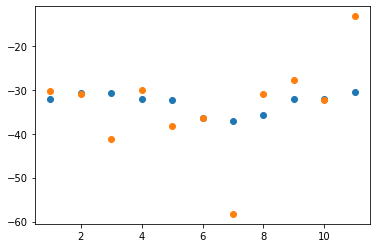

In [7]:
x_array = list(range(1, 12))
plt.scatter(x_array, y_predict)
plt.scatter(x_array, y_test)